# Dimensionality Reduction

### Why Dimensionality Reduction?

- As the number of features increase, the model becomes more complex and prone to overfitting.

- Less computational time required for training and testing models.

- Removal of redundant variables or noise in data.

- Improves prediction performance.

# Principal Component Analysis 

### Goal

- To reduce dimensionality, while retaining a large part of variation present in the data.

### Overview

- Is an unsupervised learning method used only for continuous variables.

- Assumes that variables are somewhat correlated.

- Does not involves Hyperparameters.

- Highly affected by outliers.

- Is a nonparametric method.


### Steps for the algortihm.

 Step 1: Center the data
- Centering or standarizing data

 Step 2: Covariance Matrix
- Get covariance and variance for variables

 Step 3: Eigenvectors & Eigenvalues
- Eigendecomposition for covariance matrix

 Step 4: Feature Reduction
- Keeps desired, or all, eigenvectors of principal components

 Step 5: Recast along principal components axes
- Reorients or projects the data from original axes along the principal components

### Descriptive statistics and linear algebra in PCA - A matrix:

- Assume you have a given 5 x 3 matrix with X's as column names and ids as row names.
  - Number of rows = 5
  - Number of columns = 3

$$ A = \begin{bmatrix}  & X1 & X2 & X3 \\ id 1 & 6 & 4 & 4 \\ id 2 & 8 & 3 & 3 \\ id 3 & 5 & 8 & 4 \\ id 4 & 4 & 5 & 10 \\ id 5 & 2 & 8 & 5 \end{bmatrix}$$

- To apply the PCA, we need:

  - Mean values:

  $$ M  = \begin{bmatrix} \bar X1  & \bar X2 & \bar X3 \end{bmatrix} = \begin{bmatrix} 5.0 & 5.6 & 5.2 \end{bmatrix} $$


  - Centering:
    - Substract the mean from the data 

  $$ C = A - M =  \begin{bmatrix}  & X1 - \bar X1  & X2 - \bar X2 & X3 - \bar X3 \\ id 1 & 1  & -1.6 & -1.2 \\ id 2 & 3  & -2.6 & -2.2 \\ id 3 & 0  & 2.4 & -1.2 \\ id 4 & -1  & -0.6 & 4.8 \\ id 5 & -3  & 2.4 & -0.2 \end{bmatrix} $$

  - Covariance matrix:

  $$ COV = \begin{bmatrix} & X1 - \bar X1 & X2 - \bar X2 & X3 - \bar X3 \\ X1 - \bar X1 & variance(x_{1}) & cov(x_{1},x_{2}) & cov(x_{1},x_{3}) \\ X2 - \bar X2 & cov(x_{2},x_{1}) & variance(x_{2}) & cov(x_{2},x_{3}) \\ X3 - \bar X3 & cov(x_{3},x_{1}) & cov(x_{3},x_{2}) & variance(x_{3})\end{bmatrix} = \begin{bmatrix} & X1 - \bar X1 & X2 - \bar X2 & X3 - \bar X3 \\ X1 - \bar X1 & 5 & -4 & -3 \\ X2 - \bar X2 & -4 & 5.3 & 0.35 \\ X3 - \bar X3 & -3 & 0.35 & 7.7 \end{bmatrix} $$


In [1]:
import numpy as np
# define A matrix
A = np.array([[6,4,4], [8,3,3], [5,8,4],[4,5,10],[2,8,5]])
print('Matrix A = ','\n', A,'\n')

# Write code for the above explanation here:

# calculate the mean of each column
M = np.mean(A.T, axis=1)
print('Mean values for columns = ','\n',M,'\n')
# center columns by subtracting column means
C = A - M
print('Mean centered matrix = ','\n',C,'\n')
# calculate covariance matrix of centered matrix
COV = np.cov(C.T)
print('Covariance matrix of centered matrix = ','\n',COV,'\n')

Matrix A =  
 [[ 6  4  4]
 [ 8  3  3]
 [ 5  8  4]
 [ 4  5 10]
 [ 2  8  5]] 

Mean values for columns =  
 [5.  5.6 5.2] 

Mean centered matrix =  
 [[ 1.  -1.6 -1.2]
 [ 3.  -2.6 -2.2]
 [ 0.   2.4 -1.2]
 [-1.  -0.6  4.8]
 [-3.   2.4 -0.2]] 

Covariance matrix of centered matrix =  
 [[ 5.   -4.   -3.  ]
 [-4.    5.3   0.35]
 [-3.    0.35  7.7 ]] 



### Descriptive statistics and linear algebra in PCA - Eigenvectors and Eigenvalues:

- Results for the eigenvalues substracted from covariance matrix determinant gives use the Eigenvalues scalars, each associated with a principal component.

$$ | \begin{bmatrix} 5 - \lambda & -4 & -3 \\ -4 & 5.3 - \lambda & 0.35 \\ -3 & 0.35 & 7.7 - \lambda \end{bmatrix} | = 0 $$

$$ \lambda = 0.57998089 $$
$$ \lambda = 11.00784433 $$
$$ \lambda = 6.41217478 $$

- With the Eigenvalues we can obtain the eigenvectors.

$$ \begin{bmatrix} 5 - \lambda & -4 & -3 \\ -4 & 5.3 - \lambda & 0.35 \\ -3 & 0.35 & 7.7 - \lambda \end{bmatrix} . \begin{bmatrix} v_{1,1} \\ v_{2,1} \\v_{3,1} \end{bmatrix}  = 0 $$

- For this equation we iteratively plug in each $\lambda$ value to obtain the eigenvectors v.

 For: $\lambda = 0.57998089 $

$$ v_{1} = \begin{bmatrix} 0.74200331 \\ 0.60784646  \\ 0.28276099 \end{bmatrix}$$

 For: $\lambda = 11.00784433 $

$$ v_{2} = \begin{bmatrix} 0.62563791 \\ -0.47632448  \\ -0.61781242 \end{bmatrix}$$

 For: $\lambda = 6.41217478 $

$$ v_{3} = \begin{bmatrix} 0.24084911 \\  -0.63532486  \\ 0.73372613 \end{bmatrix}$$

- The sum of all eigenvalues can be interpreted as the total variance or Inertia of the principal components
$$ TotalVariance(PC) = (\lambda_{1} + \lambda_{2} + \lambda_{3}) = 18


In [2]:
from numpy.linalg import eig

# Write code for the above explanation here:

# eigendecomposition of covariance matrix
values, vectors = eig(COV)
print('Eigenvalues of covariance matrix = ','\n',values,'\n')
print('Eigenvectors of covariance matrix = ','\n',vectors,'\n')

#Sum of eigenvalues as total variance of principal components
total_inertial=sum(values)
print('Variance of the principal components = ','\n',total_inertial,'\n')


Eigenvalues of covariance matrix =  
 [ 0.57998089 11.00784433  6.41217478] 

Eigenvectors of covariance matrix =  
 [[ 0.74200331  0.62563791  0.24084911]
 [ 0.60784646 -0.47632448 -0.63532486]
 [ 0.28276099 -0.61781242  0.73372613]] 

Variance of the principal components =  
 18.000000000000004 



### Descriptive statistics and linear algebra in PCA - Feature Reduction:

- Usually the goal of PCA is to reduce dimensions. Therefore, we will select the amount of eigenvectors that reduces our initial number of columns. 

- We started with 3 columns, so lets reduce to 2 columns. To do so, we need to sort the Eigenvalues from highest to lowest, select the 2 highest and keep their associated Eigenvectors.

 For: $\lambda_{2} = 11.00784433 $

$$ v_{2} = \begin{bmatrix} 0.62563791 \\ -0.47632448  \\ -0.61781242 \end{bmatrix}$$

 For: $\lambda_{3} = 6.41217478 $

$$ v_{3}= \begin{bmatrix} 0.24084911 \\  -0.63532486  \\ 0.73372613 \end{bmatrix}$$

- The Ratio of variance explained by each principal component can be see as each individual eingenvalue selected over the total variance.

    $$ \frac{[11.00784433 , 6.41217478]}{18} = [0.61154691, 0.35623193] $$

- The total variance % captured by the dimensionality reduction is the sum of the rations times 100.

     $$ (0.61154691 + 0.35623193)*100   = 96.77  $$

In [3]:
# Write code for the above explanation here:

# keep 2 highest values
reduced_values=values[1:3]

#Removes first column
reduced_vectors=np.delete(vectors, 0, 1)

print('Reduced eigenvalues of covariance matrix = ','\n',reduced_values,'\n')
print('Reduced eigenvectors of covariance matrix = ','\n',reduced_vectors,'\n')

# Ration of variance explained by each principal component
explained_variance=reduced_values/total_inertial
print('Ratio of variance explained by the 2 components = ','\n',explained_variance,'\n')

# Total variance captured in 2 PC's
print('Total variance captured by the 2 components = ','\n',sum(explained_variance),'\n')

Reduced eigenvalues of covariance matrix =  
 [11.00784433  6.41217478] 

Reduced eigenvectors of covariance matrix =  
 [[ 0.62563791  0.24084911]
 [-0.47632448 -0.63532486]
 [-0.61781242  0.73372613]] 

Ratio of variance explained by the 2 components =  
 [0.61154691 0.35623193] 

Total variance captured by the 2 components =  
 0.9677788392498041 



### Descriptive statistics and linear algebra in PCA - trasnformed data, loadings, and reconstruction:

- To project the data into the principal components, we need to dot multiply the centered data with the reduced eigenvector matrix.

    $$ C.[v_{2},v_{3}] = ProjectedData $$

    $$ \begin{bmatrix} 1  & -1.6 & -1.2 \\ 3  & -2.6 & -2.2 \\ 0  & 2.4 & -1.2 \\ -1  & -0.6 & 4.8 \\ -3  & 2.4 & -0.2 \end{bmatrix} . \begin{bmatrix} 0.62563791 & 0.24084911 \\ -0.47632448 & -0.63532486 \\ -0.61781242 & 0.73372613 \end{bmatrix} = \begin{bmatrix} 2.129132 & 0.376898 \\ 4.474545 & 0.760194 \\ -0.401804	& -2.405251 \\ -3.305343 & 3.662231 \\-2.896530	& -2.394072 \end{bmatrix} $$

 - To know the contribution of the original variables to the projected data, we calculate loadings as the reduced eigenvector matrix times the squared root of the Eigenvalues.

    $$ [v_{2},v_{3}] * [\sqrt \lambda_{2},\sqrt \lambda_{3}] = Loadings $$

    $$ \begin{bmatrix} 0.62563791 & 0.24084911 \\ -0.47632448 & -0.63532486 \\ -0.61781242 & 0.73372613 \end{bmatrix} . \begin{bmatrix} \sqrt 11.00784433 & \sqrt 6.41217478 \end{bmatrix} = \begin{bmatrix} 2.07574595 & 0.60988467 \\ -1.58035278 & -1.6087869  \\ -2.04978247 & 1.85796129 \end{bmatrix} $$   

- We could reconstruct back the original data using the transpose of all Eigenvectors dot multiplied by the completed projected data and adding the average to that result.

   $$ (v.ProjectedData)^T + M = OriginalData $$
   $$ \begin{bmatrix} 1  & -1.6 & -1.2 \\ 3  & -2.6 & -2.2 \\ 0  & 2.4 & -1.2 \\ -1  & -0.6 & 4.8 \\ -3  & 2.4 & -0.2 \end{bmatrix} + \begin{bmatrix} 5 & 5.6 & 5.2 \end{bmatrix} = \begin{bmatrix}  6 & 4 & 4 \\ 8 & 3 & 3 \\  5 & 8 & 4 \\  4 & 5 & 10 \\  2 & 8 & 5 \end{bmatrix} $$


In [4]:
# Write code for the above explanation here:

# projected data
projected_data = C.dot(reduced_vectors)
print('Data projected to principal components= ','\n',projected_data,'\n')

# loading data
loadings=reduced_vectors*np.sqrt(reduced_values)
print('Direction of variance scaled to principal components= ','\n',loadings,'\n')

# projected data with all components
projected_data_complete = vectors.T.dot(C.T)

# reconstructed data
original_recreated_data=(vectors.dot(projected_data_complete)).T + M
print('Reconstruction of original data using all PC= ','\n',original_recreated_data,'\n')


Data projected to principal components=  
 [[ 2.12913199  0.37689752]
 [ 4.47454472  0.76019446]
 [-0.40180386 -2.40525101]
 [-3.30534284  3.66223124]
 [-2.89653002 -2.3940722 ]] 

Direction of variance scaled to principal components=  
 [[ 2.07574595  0.60988467]
 [-1.58035278 -1.6087869 ]
 [-2.04978247  1.85796129]] 

Reconstruction of original data using all PC=  
 [[ 6.  4.  4.]
 [ 8.  3.  3.]
 [ 5.  8.  4.]
 [ 4.  5. 10.]
 [ 2.  8.  5.]] 



### Main takeaway and summary:

- Think of PCA as a way to reduce variables while keeping most of their variation information. 

- Think of the principal components as variables with charasteristics from the original variables.

- When you plot PC's, you select the 2 most explanatory first as new axes. 

- With these new axes, you can describe correlations between original variables.

- The plot shows the similarities and differences between observations and explains them in terms of which variables are characterizing them most.

Now that we undestand a bit better PCA, lets use the sklearn function to solve the same exercise previously explained. 
More information about the library [here](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)


Explained variation per principal component: [0.61154691 0.35623193]
Total variation captured:  0.9677788392498042


,X1,X2,X3
id1,6,4,4
id2,8,3,3
id3,5,8,4
id4,4,5,10
id5,2,8,5


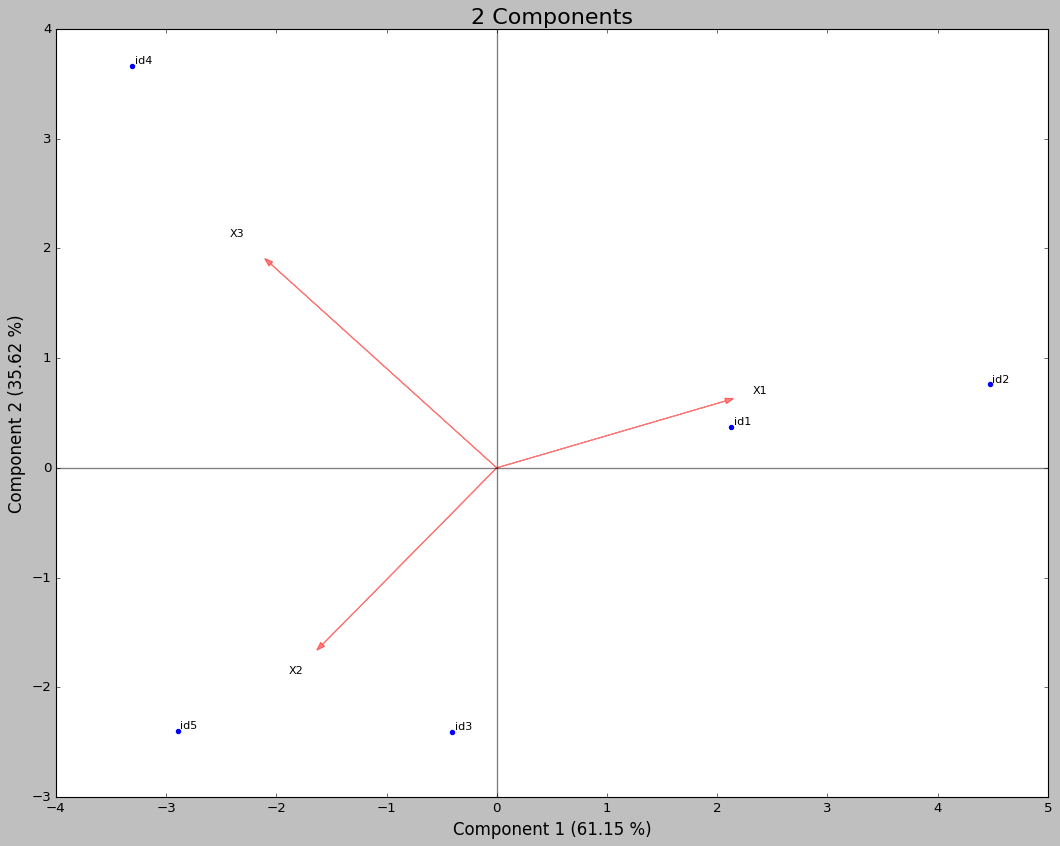

In [5]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
from Vars_Samples_Plot import vars_samples_plot

# Desired number of components or % of variance
components=2

# PCA
pca = PCA(n_components=components)
principalComponents= pca.fit_transform(A)

# Data frame for PCA
pca_df = pd.DataFrame(data = principalComponents,
 columns=["principal component " + str(i) for i in list(range(1,pca.n_components_+1))],
 index=['id1','id2','id3','id4','id5'])

# Calculating and data frame for loadings
loading_df= pd.DataFrame(pca.components_.T * np.sqrt(pca.explained_variance_),
 columns=["principal component " + str(i) for i in list(range(1,pca.n_components_+1))],
 index=['X1','X2','X3'])

# Explained variance for each component
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
# Total variance camptured after transformation
print('Total variation captured: ', pca.explained_variance_ratio_.sum())

# Visual
vars_samples_plot(ProjectedData = pca_df ,Loadings = loading_df ,ExplainedVar = list(pca.explained_variance_ratio_), Overlaid = True)

# Original data for plot insight
pd.DataFrame(A,columns=["X1","X2","X3"],
 index=['id1','id2','id3','id4','id5'])